In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Table of Contents
## 1. Adding variables
## 2. Rides of different customers throughout the week 
## 3. Rides of diff. customers throughout the day
## 4. Revenue generated throughout the day by diff. customers

In [2]:
la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"])
la.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,start_time,end_time,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0
3,3,2019-01-01 00:20:00,2019-01-01 00:50:00,05860,Walk-up,Main & 1st,Broadway & 9th,30.0,2019-01-01,1,1,1,0
4,4,2019-01-01 00:22:00,2019-01-01 00:50:00,06006,Walk-up,Main & 1st,Broadway & 9th,28.0,2019-01-01,1,1,1,0


In [3]:
# Überblick über Daten
la.dtypes

Unnamed: 0                     int64
start_time            datetime64[ns]
end_time              datetime64[ns]
bike_id                       object
user_type                     object
start_station_name            object
end_station_name              object
duration                     float64
date                          object
month                          int64
weekday                        int64
day                            int64
hour                           int64
dtype: object

# 1. Adding variables (especially price)

In [4]:
def get_weekday (ts):
    return ts.weekday()
la["Weekday"]=la["start_time"].apply(lambda x: get_weekday (x))
la["duration"] = (la["end_time"] - la["start_time"]).astype("timedelta64[m]")
la["Hour"]=la["start_time"].apply(lambda x: x.hour)

# walk_up  $1.75/30 Minutes
# oneday $5 + when over 30 min 1.75/30 Minutes
# monthly $17 + when over 30 min 1.75/30 Minutes
# annual $150 + when over 30 min 1.75/30 Minutes
# flex ignored

la["price"] = 0.0
for i, row in la.iterrows():
    if la.at[i, "user_type"] == "Walk-up":
        la.at[i, "price"] = ((la.at[i,"duration"]//30.0)+1.0)*1.75
    else: la.at[i,"price"] = (la.at[i,"duration"]//30.0)*1.75
la.head()

,Unnamed: 0,start_time,end_time,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,Weekday,Hour,price
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,1,0,1.75
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0,1,0,1.75
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,1,0,3.50
3,3,2019-01-01 00:20:00,2019-01-01 00:50:00,05860,Walk-up,Main & 1st,Broadway & 9th,30.0,2019-01-01,1,1,1,0,1,0,3.50
4,4,2019-01-01 00:22:00,2019-01-01 00:50:00,06006,Walk-up,Main & 1st,Broadway & 9th,28.0,2019-01-01,1,1,1,0,1,0,1.75


In [5]:
walk_up = la[la["user_type"]=="Walk-up"]
monthly = la[la["user_type"]=="Monthly Pass"]
annual = la[la["user_type"]=="Annual Pass"]
oneday = la[la["user_type"]=="One Day Pass"]
flex = la[la["user_type"]=="Flex Pass"]

# 2. Rides of different customers throughout the week

In [6]:
walk_mon = walk_up[walk_up["Weekday"]==0]
walk_tue = walk_up[walk_up["Weekday"]==1]
walk_wed = walk_up[walk_up["Weekday"]==2]
walk_thu = walk_up[walk_up["Weekday"]==3]
walk_fri = walk_up[walk_up["Weekday"]==4]
walk_sat = walk_up[walk_up["Weekday"]==5]
walk_sun = walk_up[walk_up["Weekday"]==6]
walk_rides = np.array([walk_mon["start_time"].size, walk_tue["start_time"].size, walk_wed["start_time"].size, walk_thu["start_time"].size, walk_fri["start_time"].size, walk_sat["start_time"].size, walk_sun["start_time"].size])
walk_rides

array([ 9572,  9628,  8768,  9723, 11766, 14121, 14279])

In [7]:
monthly_mon = monthly[monthly["Weekday"]==0]
monthly_tue = monthly[monthly["Weekday"]==1]
monthly_wed = monthly[monthly["Weekday"]==2]
monthly_thu = monthly[monthly["Weekday"]==3]
monthly_fri = monthly[monthly["Weekday"]==4]
monthly_sat = monthly[monthly["Weekday"]==5]
monthly_sun = monthly[monthly["Weekday"]==6]
monthly_rides = np.array([monthly_mon["start_time"].size, monthly_tue["start_time"].size, monthly_wed["start_time"].size, monthly_thu["start_time"].size, monthly_fri["start_time"].size, monthly_sat["start_time"].size, monthly_sun["start_time"].size])
monthly_rides

array([26312, 29029, 27096, 27982, 27001, 16210, 16047])

In [8]:
annual_mon = annual[annual["Weekday"]==0]
annual_tue = annual[annual["Weekday"]==1]
annual_wed = annual[annual["Weekday"]==2]
annual_thu = annual[annual["Weekday"]==3]
annual_fri = annual[annual["Weekday"]==4]
annual_sat = annual[annual["Weekday"]==5]
annual_sun = annual[annual["Weekday"]==6]
annual_rides = np.array([annual_mon["start_time"].size, annual_tue["start_time"].size, annual_wed["start_time"].size, annual_thu["start_time"].size, annual_fri["start_time"].size, annual_sat["start_time"].size, annual_sun["start_time"].size])
annual_rides

array([3384, 3779, 3486, 3365, 3470, 1965, 1629])

In [9]:
oneday_mon = oneday[oneday["Weekday"]==0]
oneday_tue = oneday[oneday["Weekday"]==1]
oneday_wed = oneday[oneday["Weekday"]==2]
oneday_thu = oneday[oneday["Weekday"]==3]
oneday_fri = oneday[oneday["Weekday"]==4]
oneday_sat = oneday[oneday["Weekday"]==5]
oneday_sun = oneday[oneday["Weekday"]==6]
oneday_rides = np.array([oneday_mon["start_time"].size, oneday_tue["start_time"].size, oneday_wed["start_time"].size, oneday_thu["start_time"].size, oneday_fri["start_time"].size, oneday_sat["start_time"].size, oneday_sun["start_time"].size])
oneday_rides

array([1569, 1604, 1530, 1585, 2068, 2402, 3370])

In [10]:
flex_mon = flex[flex["Weekday"]==0]
flex_tue = flex[flex["Weekday"]==1]
flex_wed = flex[flex["Weekday"]==2]
flex_thu = flex[flex["Weekday"]==3]
flex_fri = flex[flex["Weekday"]==4]
flex_sat = flex[flex["Weekday"]==5]
flex_sun = flex[flex["Weekday"]==6]
flex_rides = np.array([flex_mon["start_time"].size, flex_tue["start_time"].size, flex_wed["start_time"].size, flex_thu["start_time"].size, flex_fri["start_time"].size, flex_sat["start_time"].size, flex_sun["start_time"].size])
flex_rides

array([39, 50, 38, 56, 52, 48, 30])

Text(0.5, 1.0, 'Number of Rides throughout a week of different user types')

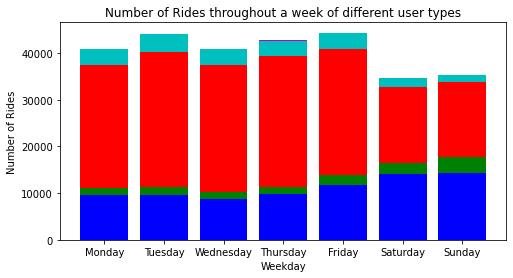

In [11]:
fig,ax = plt.subplots(figsize=(8,4))
weekdays_sub= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([walk_rides, oneday_rides, monthly_rides, annual_rides, flex_rides])
color_list = ['b', 'g', 'r', 'c', 'm']
for i in range(data.shape[0]):
  plt.bar(weekdays_sub, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week of different user types")

# 3. Rides of diff. customers throughout the day

In [12]:
# money made for every hour on a day

#walkup
day_rides_walk_up = np.zeros(24)
for i in range(24):
    day_rides_walk_up[i] = walk_up[walk_up['Hour']==i].size
    
rides_walk_up = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_rides_walk_up})

#monthly
day_rides_monthly = np.zeros(24)
for i in range(24):
    day_rides_monthly[i] = monthly[monthly['Hour']==i].size
    
rides_monthly = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_rides_monthly})

#annual
day_rides_annual = np.zeros(24)
for i in range(24):
    day_rides_annual[i] = annual[annual['Hour']==i].size
    
rides_annual = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_rides_annual})

#oneday
day_rides_oneday = np.zeros(24)
for i in range(24):
    day_rides_oneday[i] = oneday[oneday['Hour']==i].size
    
rides_oneday = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_rides_oneday})


Text(0.5, 1.0, 'Number of Rides throughout a week of different user types')

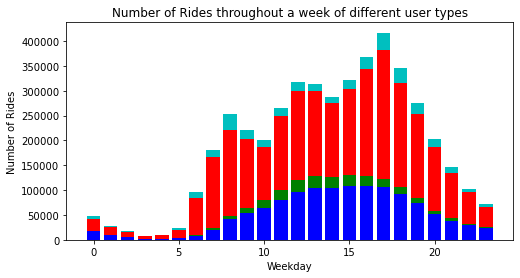

In [13]:
fig,ax = plt.subplots(figsize=(8,4))
day_rides = np.arange(0,24)
data = np.array([day_rides_walk_up, day_rides_oneday, day_rides_monthly, day_rides_annual])
color_list = ['b', 'g', 'r', 'c']
for i in range(data.shape[0]):
  plt.bar(day_rides, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week of different user types")

# 4. Revenue generated throughout the day by diff. customers

In [14]:
# walk_up  $1.75/30 Minutes
# oneday $5 + when over 30 min 1.75/30 Minutes
# monthly $17 + when over 30 min 1.75/30 Minutes
# annual $150 + when over 30 min 1.75/30 Minutes
# flex ignored

In [15]:
day_prices = np.zeros(24)
for i in range(24):
    x = la[la['Hour']==i]
    day_prices[i] = sum(x["price"])
prices_la = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_prices})

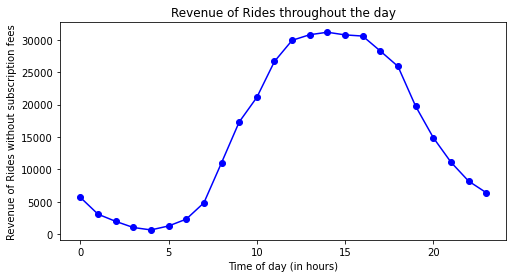

In [16]:
plt.figure(figsize=(8,4))
plt.plot(prices_la['Time_Period'],prices_la['Revenue'],'o-', color='blue')
plt.xlabel("Time of day (in hours)")
plt.ylabel("Revenue of Rides without subscription fees")
plt.title("Revenue of Rides throughout the day")
plt.show()

In [17]:
day_prices_walk_up = np.zeros(24)
for i in range(24):
    x = walk_up[walk_up['Hour']==i]
    day_prices_walk_up[i] = sum(x["price"])
    
prices_walk_up = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_prices_walk_up})

day_prices_monthly = np.zeros(24)
for i in range(24):
    x = monthly[monthly['Hour']==i]
    day_prices_monthly[i] = sum(x["price"])
    
prices_monthly = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_prices_monthly})

day_prices_annual = np.zeros(24)
for i in range(24):
    x = annual[annual['Hour']==i]
    day_prices_annual[i] = sum(x["price"])
    
prices_annual = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_prices_annual})

day_prices_oneday = np.zeros(24)
for i in range(24):
    x = oneday[oneday['Hour']==i]
    day_prices_oneday[i] = sum(x["price"])
    
prices_oneday = pd.DataFrame({'Time_Period': range(24), 'Revenue': day_prices_oneday})

Text(0.5, 1.0, 'Revenue throughout a week of different user types')

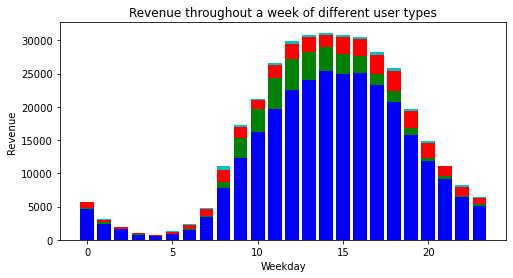

In [18]:
fig,ax = plt.subplots(figsize=(8,4))
day = np.arange(0,24)
data = np.array([day_prices_walk_up, day_prices_oneday, day_prices_monthly, day_prices_annual])
color_list = ['b', 'g', 'r', 'c']
for i in range(data.shape[0]):
  plt.bar(day, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Revenue")
ax.set_title("Revenue throughout a week of different user types")